## Tewa 1 Tutorial,
Linear Regression using scikit-learn (sklearn), data in Pandas DataFrame

- fitting linear regression models

- checking coefficients of fitted models

- checking quality of model fit  

### 27 April 2022-- Jozsef Arato


### load libraries

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import linalg, stats

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving Real estate.csv to Real estate.csv


### load data

In [ ]:
data = pd.read_csv("Real estate.csv")

Data Set Information:

The market historical data set of real estate valuation are collected from Sindian Dist., New Taipei City, Taiwan.

Attribute Information:

The inputs are as follows

X1=the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)

X2=the house age (unit: year)

X3=the distance to the nearest MRT station (unit: meter)

X4=the number of convenience stores in the living circle on foot (integer)

X5=the geographic coordinate, latitude. (unit: degree)

X6=the geographic coordinate, longitude. (unit: degree)

The output is as follow

Y= house price of unit area (10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared)



In [ ]:
data

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


data-set size

In [ ]:
np.shape(data)

(414, 8)

In [ ]:
data["Y house price of unit area"]

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: Y house price of unit area, Length: 414, dtype: float64

In [ ]:
data["Y house price of unit area"].to_numpy()

array([ 37.9,  42.2,  47.3,  54.8,  43.1,  32.1,  40.3,  46.7,  18.8,
        22.1,  41.4,  58.1,  39.3,  23.8,  34.3,  50.5,  70.1,  37.4,
        42.3,  47.7,  29.3,  51.6,  24.6,  47.9,  38.8,  27. ,  56.2,
        33.6,  47. ,  57.1,  22.1,  25. ,  34.2,  49.3,  55.1,  27.3,
        22.9,  25.3,  47.7,  46.2,  15.9,  18.2,  34.7,  34.1,  53.9,
        38.3,  42. ,  61.5,  13.4,  13.2,  44.2,  20.7,  27. ,  38.9,
        51.7,  13.7,  41.9,  53.5,  22.6,  42.4,  21.3,  63.2,  27.7,
        55. ,  25.3,  44.3,  50.7,  56.8,  36.2,  42. ,  59. ,  40.8,
        36.3,  20. ,  54.4,  29.5,  36.8,  25.6,  29.8,  26.5,  40.3,
        36.8,  48.1,  17.7,  43.7,  50.8,  27. ,  18.3,  48. ,  25.3,
        45.4,  43.2,  21.8,  16.1,  41. ,  51.8,  59.5,  34.6,  51. ,
        62.2,  38.2,  32.9,  54.4,  45.7,  30.5,  71. ,  47.1,  26.6,
        34.1,  28.4,  51.6,  39.4,  23.1,   7.6,  53.3,  46.4,  12.2,
        13. ,  30.6,  59.6,  31.3,  48. ,  32.5,  45.5,  57.4,  48.6,
        62.9,  55. ,

In [ ]:
data["Y house price of unit area"][3:]

3      54.8
4      43.1
5      32.1
6      40.3
7      46.7
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: Y house price of unit area, Length: 411, dtype: float64

In [ ]:
list(data)

['No',
 'X1 transaction date',
 'X2 house age',
 'X3 distance to the nearest MRT station',
 'X4 number of convenience stores',
 'X5 latitude',
 'X6 longitude',
 'Y house price of unit area']

In [ ]:
vars = list(data)
print(vars)

['No', 'X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude', 'Y house price of unit area']


In [ ]:
print(data.iloc[0:3, 5:7])

   X5 latitude  X6 longitude
0     24.98298     121.54024
1     24.98034     121.53951
2     24.98746     121.54391


different ways of accessing a column from a dataframe

In [ ]:
print(data.iloc[0:3, 7])
print(data[vars[7]][0:3])
print(data["Y house price of unit area"][0:3])

0    37.9
1    42.2
2    47.3
Name: Y house price of unit area, dtype: float64
0    37.9
1    42.2
2    47.3
Name: Y house price of unit area, dtype: float64
0    37.9
1    42.2
2    47.3
Name: Y house price of unit area, dtype: float64


## Explorative data visualization
visualize the data with scatter plots (for the X1-X6 predictors separately)

0
1
2
3
4
5


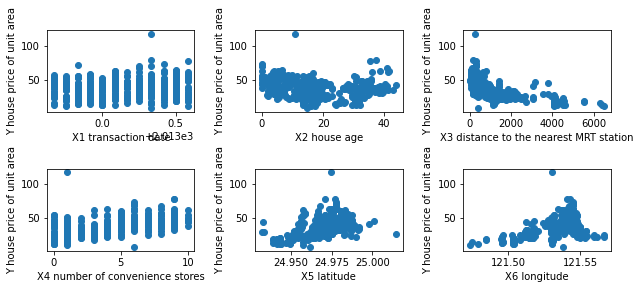

In [ ]:
plt.figure(figsize=(9, 4))
for c, v in enumerate(vars[1:7]):
    plt.subplot(2, 3, c + 1)
    plt.scatter(data[v], data[vars[7]])
    plt.xlabel(v)
    plt.ylabel(vars[7])
plt.tight_layout()

## Correlation between predictors
stats.pearsonr

to calculate pearsonr correlation between each pair of predictors



In [ ]:
n = len(vars) - 1
corrs = np.zeros((n, n))
for cv1, v1 in enumerate(vars[1:]):
    for cv2, v2 in enumerate(vars[1:]):
        corrs[cv1, cv2] = stats.pearsonr(data[v1], data[v2])[0]

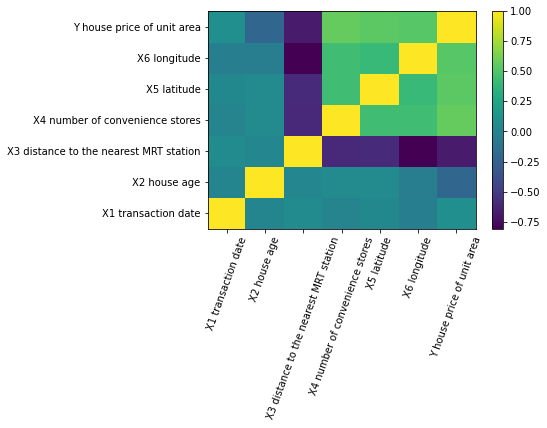

In [ ]:
plt.pcolor(corrs)
plt.xticks(np.arange(n) + 0.5, vars[1:], rotation=70)
plt.yticks(np.arange(n) + 0.5, vars[1:])
plt.colorbar()

In [ ]:
data.iloc[:, 1:].corr()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
X1 transaction date,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
X2 house age,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


In [ ]:
data.corr()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,1.000000,-0.048658,-0.032808,-0.013573,-0.012699,-0.010110,-0.011059,-0.028587
X1 transaction date,-0.048658,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
X2 house age,-0.032808,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,-0.013573,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,-0.012699,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,-0.010110,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.011059,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,-0.028587,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


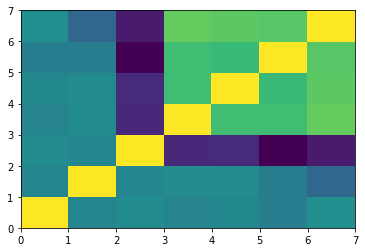

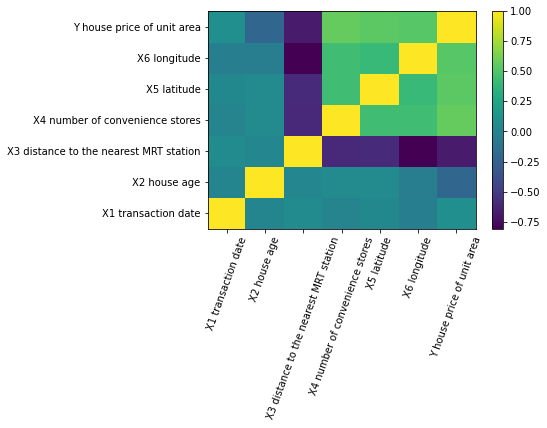

In [ ]:
plt.pcolor(data.iloc[:, 1:].corr())
plt.figure()
plt.pcolor(corrs)
plt.xticks(np.arange(n) + 0.5, vars[1:], rotation=70)
plt.yticks(np.arange(n) + 0.5, vars[1:])
plt.colorbar()

## Linear regression with a single predictor
using the sklearn library

now we use only one predictor, that is house age, to predict aparment price


In [ ]:
from sklearn.linear_model import LinearRegression

sklearn uses an "object oriented" programming style

that is a slightly different syntax form numpy,matplotlib

(but somewhat similar to pandas, a pandas dataframe is an object)

In [ ]:
lr = linear_regression()  # we create a linear regression object

LinearRegression()

In [ ]:
lr.fit(x, y)

LinearRegression()

In [ ]:
type(lr)

sklearn.linear_model._base.LinearRegression

In [ ]:
lr.fit(data[vars[2:4]], data[vars[7]])

LinearRegression()

In [ ]:
vars[2:4]

['X2 house age', 'X3 distance to the nearest MRT station']

fitting the regression model

In [ ]:
x = data[vars[2]].to_numpy()
print(np.shape(x))
x = x.reshape(-1, 1)
print(np.shape(x))
y = data[vars[7]]
lr.fit(x, y)

(414,)
(414, 1)


LinearRegression()

check fitted parameters intercept and coefs

In [ ]:
lr.intercept_

49.885585756906636

In [ ]:
lr.coef_

array([-0.23102658, -0.00720862])

In [ ]:
-2.54477973e-01

-0.254477973

score-- coefficient of determination


In [ ]:
lr.score(data[vars[2:4]], data[vars[7]])

0.49114669575911474

In [ ]:
# lr.predict(Data[Vars[2:4]])

prediction of the regression model:
1. use the built in LinearRegression.predict() method
2. calculate the prediction, using the intercept and the slope(coef_)
3. compare the predictions achieved the two ways

In [ ]:
preds = lr.predict(x)
print(preds[0:5])
preds2 = lr.intercept_ + lr.coef_ * x
print(preds2[0:5])

[34.38706764 37.53067287 39.08990107 39.08990107 41.17725495]
[[34.38706764]
 [37.53067287]
 [39.08990107]
 [39.08990107]
 [41.17725495]]


visualize prediction using matplotlib

Text(0, 0.5, 'Y house price of unit area')

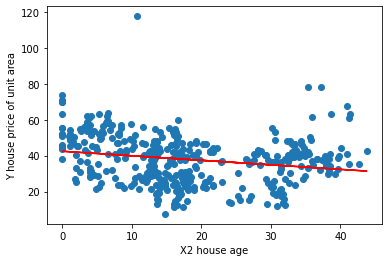

In [ ]:
plt.scatter(x, y)
plt.plot(x, preds2, color="r")
plt.xlabel(vars[2])
plt.ylabel(vars[7])

## Multiple linear regression

now let's use the four measurements X1-X4 in a combined model

for this we make a combined predictor matrix from our original dataframe, containig only the predictors we want to use:

In [ ]:
print(vars[1:5])
x = data[vars[1:5]]
print(type(x))

y = data[vars[7]]

['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores']
<class 'pandas.core.frame.DataFrame'>


fit multiple linear regression

In [ ]:
lr2 = linear_regression()

In [ ]:
lr2.fit(x, y)

LinearRegression()

In [ ]:
lr2.coef_

array([ 5.77804282e+00, -2.54477973e-01, -5.51299698e-03,  1.25786410e+00])

observe fitted parameters and goodness of fit

compare to invidual model above

In [ ]:
lr2.score(x, y)

0.5552973207362785

# comparison to scipy.linalg.lstsq

fit intercept parameter vs column of ones in design matrix

and use lstsq to fit a regression model

In [ ]:
x = data[vars[1:5]].to_numpy()
y = data[vars[7]].to_numpy()
xx = np.column_stack((np.ones(len(y)), x))
print(xx)

[[1.000000e+00 2.012917e+03 3.200000e+01 8.487882e+01 1.000000e+01]
 [1.000000e+00 2.012917e+03 1.950000e+01 3.065947e+02 9.000000e+00]
 [1.000000e+00 2.013583e+03 1.330000e+01 5.619845e+02 5.000000e+00]
 ...
 [1.000000e+00 2.013250e+03 1.880000e+01 3.909696e+02 7.000000e+00]
 [1.000000e+00 2.013000e+03 8.100000e+00 1.048101e+02 5.000000e+00]
 [1.000000e+00 2.013500e+03 6.500000e+00 9.045606e+01 9.000000e+00]]


In [ ]:
lr_int_1 = linear_regression(fit_intercept=False)
lr_int_1.fit(xx, y)
print(lr_int_1.coef_)
print(lr_int_1.intercept_)

[-1.15887478e+04  5.77804282e+00 -2.54477973e-01 -5.51299698e-03
  1.25786410e+00]
0.0


In [ ]:
-1.15887478e04

-11588.7478

In [ ]:
lr_int_1 = linear_regression(fit_intercept=True)
lr_int_1.fit(x, y)
print(lr_int_1.coef_)
print(lr_int_1.intercept_)

[ 5.77804282e+00 -2.54477973e-01 -5.51299698e-03  1.25786410e+00]
-11588.747800126179


In [ ]:
linalg.lstsq(xx, y)[0]

array([-1.15887478e+04,  5.77804282e+00, -2.54477973e-01, -5.51299698e-03,
        1.25786410e+00])

##  feature selection
 1. add predictors (features) one by one, use X1 only first, and add all predictors sequentially until X6, and plot the obtained score for each model (as a function of the number of predictors)
 2. add predictors in a random order one-by-one, and plot the obtained score for each model
 3. add predictors in the order of the absolute pearson correlation with the outcome variable Y (starting with the largest), and plot the obtained score

['X1 transaction date']
0.007654606208700954
[4.2219084]
['X1 transaction date', 'X2 house age']
0.05265589225155287
[ 4.40157748 -0.25340019]
['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station']
0.5085322806489995
[ 6.37535127 -0.23355116 -0.00729475]
['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores']
0.5552973207362785
[ 5.77804282e+00 -2.54477973e-01 -5.51299698e-03  1.25786410e+00]
['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude']
0.582303344398553
[ 5.13477514e+00 -2.69379371e-01 -4.35334998e-03  1.13614355e+00
  2.26881616e+02]
['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']
0.5823704472723009
[ 5.14622746e+00 -2.69695448e-01 -4.48746107e-03  1.13327690e+00
  2.25472976e+02 -1.24236012e+01]


(array([-0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7]),
 <a list of 9 Text major ticklabel objects>)

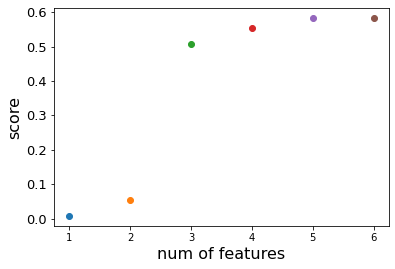

In [ ]:
n_features = 6
lr = linear_regression()
y = data[vars[7]]
for f in np.arange(1, n_features + 1):
    print(vars[1 : 1 + f])
    x = data[vars[1 : 1 + f]]
    lr.fit(x, y)
    score = lr.score(x, y)

    print(score)
    print(lr.coef_)
    plt.scatter(f, score)
plt.xlabel("num of features", fontsize=16)
plt.ylabel("score", fontsize=16)
plt.yticks(fontsize=13)

### homework
## training and test set
1. split that the X and Y data into 80% training and 20% test set

Option 1: take the first 80% of data as training, rest as test), you can use indexing for this: eg: Data[0:int(len(Data)*.8)]selects the first 80% percent of a numpy array

Option 2: randomly select 80% of the data as training, rest as test  (this is the better approach)

!!! Try not to use the built in Train-Test Split function!

2. fit the model to the training set, and calcualte the score both for the training and the test set

3. combine with the previous excercize--try to find the best combination of parameters that best explain the test data..  (try different combinations of predictors, fit on the training data, calculate the score for both training and test).

4. try to visualize, with a similar figure to Slide 7 of Lecture 4 (just with the score on the y-axis, instead of the error)

